In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_data = pd.read_pickle('df_data-pkl')

In [2]:
df_PT = df_data[df_data['job_country'] == 'Portugal']
df_PT['job_posted_month_no'] = df_PT['job_posted_date'].dt.month
df_PT_explode = df_PT.explode('job_skills')

/var/folders/rw/s684x_bj2ld32gqpw2zyxm740000gn/T/ipykernel_76362/1024612600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PT['job_posted_month_no'] = df_PT['job_posted_date'].dt.month


In [3]:
# Group by month and job_skills
df_PT_pivot = df_PT_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_PT_pivot

job_skills,airflow,alteryx,angular,angular.js,ansible,asana,asp.net,asp.net core,assembly,atlassian,...,vue.js,watson,webex,windows,wire,word,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,64,15,10,0,19,0,3,0,3,2,...,0,1,0,22,0,27,0,0,1,3
2,45,7,2,0,11,0,2,1,0,3,...,0,0,4,11,0,12,1,0,0,1
3,30,3,8,0,5,0,1,0,1,3,...,2,0,0,13,0,8,0,0,2,1
4,30,3,3,0,7,0,0,0,1,2,...,2,0,2,6,0,12,0,1,0,2
5,26,5,3,1,3,0,0,0,0,0,...,3,0,0,1,0,7,0,0,0,0
6,31,8,6,0,10,0,0,0,1,2,...,0,0,0,8,0,16,0,0,0,1
7,25,6,2,0,10,0,0,0,0,0,...,0,0,0,14,0,13,0,0,0,2
8,38,8,6,0,10,1,1,0,1,2,...,1,0,0,6,0,8,0,0,0,4
9,25,8,2,0,7,0,0,0,0,4,...,0,0,0,4,1,8,0,0,0,2


In [4]:
# sorts by count
df_PT_pivot.loc['Total'] = df_PT_pivot.sum()
df_PT_pivot = df_PT_pivot[df_PT_pivot.loc['Total'].sort_values(ascending=False).index]
df_PT_pivot = df_PT_pivot.drop('Total')

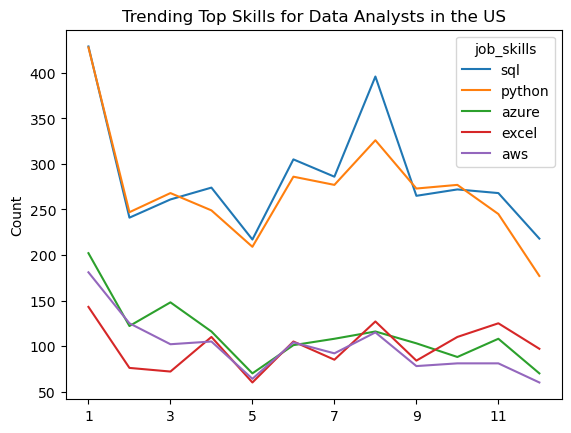

In [5]:

df_PT_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [6]:

# Get monthly totals
PT_totals = df_PT.groupby('job_posted_month_no').size()

In [7]:

# divide first 12 rows of df_DA_pivot by DA_totals
df_PT_percent = df_PT_pivot.iloc[:12].div(PT_totals/100, axis=0)

# changes month number to month name
df_PT_percent = df_PT_percent.reset_index()
df_PT_percent['job_posted_month'] = df_PT_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_PT_percent = df_PT_percent.set_index('job_posted_month')
df_PT_percent = df_PT_percent.drop(columns='job_posted_month_no')

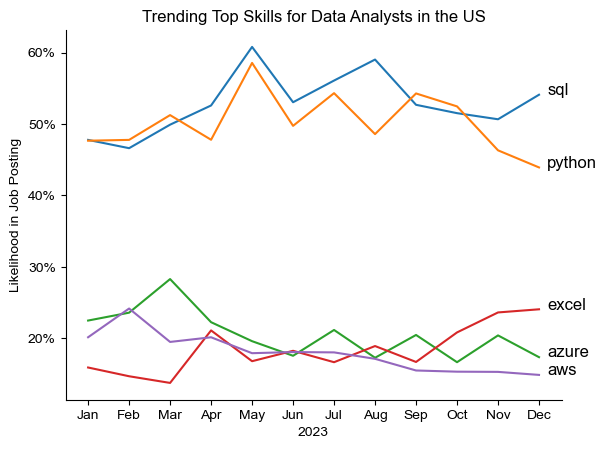

In [8]:

from matplotlib.ticker import PercentFormatter

df_plot = df_PT_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()